In [5]:
import numpy as np
import math as m
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import scipy.sparse.linalg as spla
from scipy import sparse, ndimage
%timeit
np.random.seed(0)

In [6]:
#Tentative Test Case Laplacian Matrix
#Generate the 10000x10000 2D Laplacian Matrix
nx, ny = 100,100
N  = nx*ny
main_diag = np.ones(N)*-4.0
side_diag = np.ones(N-1)
side_diag[np.arange(1,N)%4==0] = 0
up_down_diag = np.ones(N-3)
diagonals = [main_diag,side_diag,side_diag,up_down_diag,up_down_diag]
laplacian = sparse.diags(diagonals, [0, -1, 1,nx,-nx], format="csr")
L = laplacian.toarray()
print(L.shape)

(10000, 10000)


In [7]:
#Get 10000x10000 laplacian of the matrix using Scipy
#U = sp.sparse.random(10000,10000)
#L = sp.ndimage.filters.laplace(U)

In [8]:
#Generate Solution Vector
#b = np.random.randint(low=0,high=1,size=(10000,1))
#b = np.random.uniform(0,1,size=(10000,1))
b = np.random.rand(10000,1)
print(b.shape)

(10000, 1)


#### Gradient Descent

Gradient Descent Implementation Results
solution vector norm 125.00027480546144
error 0.0008441173254952326
CPU times: user 21.4 s, sys: 203 ms, total: 21.6 s
Wall time: 12.2 s


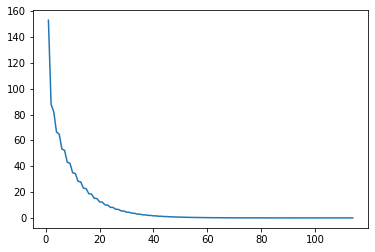

In [13]:
%%time
x_k = np.random.rand(10000,1)
error_tol = 0.001
r_k = b - np.dot(L, x_k)
resid_gd =[]
step_gd = []
step = 0
while np.linalg.norm(r_k) > error_tol:
    r_k = b - np.dot(L,x_k)
    alpha_k = np.asscalar(np.dot(r_k.T,r_k)/(np.dot(r_k.T,np.dot(L,r_k))))
    x_k = x_k + (alpha_k*r_k)#*(0.00001)
    step = step+1
    step_gd.append(step)
    resid_gd.append(np.linalg.norm(r_k))
#    print(np.linalg.norm(r_k))
print("Gradient Descent Implementation Results")
print("solution vector norm", np.linalg.norm(x_k))
print("error", np.linalg.norm(r_k))
plt.plot(step_gd, resid_gd);

#### Conjugate Gradient Descent

Conjugate Gradient Descent Implementation Result
sol vector norm 126.2546916369103
error 0.000726596071405685
CPU times: user 11.6 s, sys: 98.6 ms, total: 11.7 s
Wall time: 6.73 s


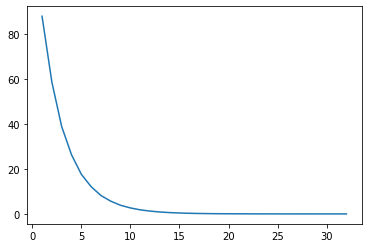

In [14]:
%%time
x_kcgd = np.random.rand(10000,1)
b_cgd = np.random.rand(10000,1)
r_kcgd = b_cgd - np.dot(L,x_kcgd)
error_tol = .001
step = 0
step_cgd = []
resid_cgd = []
while np.linalg.norm(r_kcgd)>error_tol:
    r_kcgd = b_cgd - np.dot(L,x_kcgd)
    p_k = r_kcgd
    alpha_k = np.asscalar(np.dot(r_kcgd.T,r_kcgd)/np.dot(p_k.T,np.dot(L,p_k)))
    x_kcgd = x_kcgd + alpha_k*p_k
    r_kcgd = r_kcgd - alpha_k*(np.dot(L,p_k))
    beta_k = np.asscalar(np.dot(r_kcgd.T,r_kcgd)/np.dot(p_k.T,p_k))
    p_k = r_kcgd + beta_k*p_k
    alpha_k = np.asscalar(np.dot(r_kcgd.T,r_kcgd)/np.dot(p_k.T,np.dot(L,p_k)))
    x_kcgd = x_kcgd+(alpha_k*p_k)
    resid_cgd.append(np.linalg.norm(r_kcgd))
    step = step+1
    step_cgd.append(step)
    #print(np.linalg.norm(r_kcgd))
print("Conjugate Gradient Descent Implementation Result")
print("sol vector norm", np.linalg.norm(x_kcgd))
print("error", np.linalg.norm(r_kcgd))
plt.plot(step_cgd, resid_cgd);

In [ ]:
#Sketch of CGD
x_k = np.random.rand(10000,1)
error_tol = 0.1
#while np.linalg.norm(r_k) > error_tol:
    r_0 = b - np.dot(L,x_0)
    p_0 = r_0
    alpha_0 = np.asscalar(np.dot(r_0.T,r_0)/np.dot(p_0.T,np.dot(L,p_0)))
    x_1 = x_0 + alpha_0*p_0    
    r_1 = r_0 - alpha_0*(np.dot(L,p_0))
    beta_0 = np.asscalar(np.dot(r_1.T,r_1)/(np.dot(r_0.T,r_0)))
    p_1 = r_1 + beta_0*p_0

    alpha_1 = np.asscalar(np.dot(r_1.T,r_1)/np.dot(p_1.T,np.dot(L,p_1)))
    x_2 = x_1 + alpha_1*p_1
    r_2 = r_1 - alpha_1*(np.dot(L,p_1))
    beta_1 = np.asscalar(np.dot(r_2.T,r_2)/np.dot(r_1.T,r_1))
    p_2 = r_1 + beta_1*p_1